# Tweepy Live Stream

In [25]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

import datetime
import pandas as pd

In [26]:
CONSUMER_KEY = 'wiaGtu1zwULbsTVF78YIyVKAM'
CONSUMER_SECRET = 'oyoFJDci7euuhd8JlIbSXgKiQooKGzkZiDn7E7BC2QGPgSaAp9'
OAUTH_TOKEN = '276683021-iYMpGdDhZrxuajgbTQsHnQhthXjEPktuZWAgs5os'
OAUTH_SECRET = '9Avf9kkCBzslMnV1Q7DMhSITl8FmlBfdXjXJa4Z62zZ0H'
#from my app, I can provide my own key, secret, and token

In [27]:
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print(status.text)
        
    def on_error(self, status_code): #handling errors
        if status_code ==420:
            return False #returns false in on_status disconnects the stream

In [28]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET)
api = tweepy.API(auth)

#get authorization from twitter api

In [ ]:
twitterStream = tweepy.Stream(auth, MyStreamListener())
twitterStream.filter(track=["#grammys2017"])
#twitter stream on the #grammy2017

In [6]:
#test to see if auth, api, token and keys worked
#pulls the first 20 tweets from my Twitter timeline
api = tweepy.API(auth)
tweets_raw_data = []
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print (tweet.text)
    tweets_raw_data.append(tweet)

Thug leading the way for these young artists https://t.co/9bAQddZ9Hi
RT @OwenJones84: This is one of the biggest injustices on earth that you're likely to know little about. The silence over the Chinese regim…
RT @APCentralRegion: R. Kelly sings for 28 seconds and hobnobs for about half an hour with fans who paid $50 to $100 to see him at an Illin…
These restaurants around the U.S. are doing next-level pasta. Here's where you can buy the best shapes to cook at h… https://t.co/fkzjhLJIOF
Thx for being there. Live comedy is way more fun. https://t.co/s7r8aKs4iO
Let’s go for 2 in a row! Back soon! https://t.co/6P2DVATTSf
Thx for being a part of a hell of a show!! https://t.co/kN92oxdV5D
Help them win this thing! https://t.co/5hVtUDswTA
It was the cutest thing. A silver-white polar bear cub. Then they called it Hertha. And the magic was gone. https://t.co/3WlKBTGZgO
RT @APEastRegion: Caroline Kennedy calls Nancy Pelosi "the most important woman in American political history." The House Spe

In [11]:
query = '#grammys2017'
result_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(100)]
#search for the query in tweets

In [12]:
tweet = result_tweets[0]
tweet_json = tweet._json
tweet_json['text']
#return the tweets as json

'RT @postsbiebers: Justin Bieber is the male artist with the most nominations in the pop categories of the 2017 Grammys.\n\n#GrammyNominations…'

In [13]:
hashtags_tweet = tweet_json['entities']['hashtags']
hashtags_tweet

[{'text': 'GrammyNominations', 'indices': [121, 139]}]

In [15]:
tweettexts = [tweet.text for tweet in result_tweets]

for tweettext in tweettexts[0:100]:
    print(tweettext)
    
#print the tweets with the #grammys2017

RT @postsbiebers: Justin Bieber is the male artist with the most nominations in the pop categories of the 2017 Grammys.

#GrammyNominations…
RT @roxxeygirl2176: So what the Grammys producer meant was, Make a political statement if it fits in line w/ours. U go @joyvilla! #grammys2…
RT @RepublicRecords: Get ready for #grammys2017 with @RecordingAcad nom @ArianaGrande!

#DangerousWoman is on sale for $7.99 on #iTunes:
ht…


In [ ]:
#search_query = 'top 2017 songs'
#filename = '%s_%s.csv' % (search_query, datetime.datetime.now().strftime('%Y-%m-%d_%H.%M.%S'))
#myStreamListener = MyStreamListener(limit=50,
                                    print_output=False,
                                    filename = filename,
                                    search_terms = search_query,
                                    strict_text_search=True)
#song_df = pd.read_csv(filename)

In [ ]:
#filename = '%s_%s.csv' % (search_query, datetime.datetime.now().strftime('%Y-%m-%d_%H.%M.%S'))
#song_df = pd.read_csv(filename)

# Spotify API

https://tgel0.github.io/blog/spotify-data-project-part-1-from-data-retrieval-to-first-insights/

https://developer.spotify.com/documentation/web-api/quick-start/

https://github.com/plamere/spotipy/tree/master/examples

In [1]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import sys

#need to install spotipy and requests on terminal

In [2]:
CLIENT_ID = "ac528ea7a9c4458e90580335ba98594b"
CLIENT_SECRET = "4e527afb7c7543ada67b5e455d22a6be"

TOKEN = util.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
#define client id and secret and token to obtain spotify api

Below code referenced from: https://github.com/rileynwong/spotify-analysis/blob/master/download_data.py

In [3]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
#import pylyrics3
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')


def get_features(track_id):
    features_results = sp.audio_features([track_id])
    json_features = json.dumps(features_results)
    features_data = json.loads(json_features)

    # Convert features dictionary to a list
    features_list = list(features_data[0].values())

    return features_list


client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sentiment_analyzer = SIA()

# IDs of study playlists and other miscellanoues ones
playlist_ids = [
    "37i9dQZEVXcMfRA6zd57Mv", #Discover Weekly
    "37i9dQZF1DX8Uebhn9wzrS", #Chill Lofi Study Beats1
    "1vJXwfFehYXFUWzL6Lywvt", #Oldies
    "37i9dQZF1DWSSrwtip3vZP", #Study Zone2
    "37i9dQZF1DWYRcvdDwEl3O", #Just Focus3
    "37i9dQZF1DX8NTLI2TtZa6", #Intense Studying4
    "7uBVfbw0xEqUAOsv9RtpDD", #chill beats
    "37i9dQZF1DX4y8h9WqDPAE", #Channel X
    "37i9dQZF1Ej6l5ljW6mLUj", #Tastebreakers
    "37i9dQZF1DWX9ZIH7jslKG", #Deep Concentration5
    "37i9dQZF1DWZwtERXCS82H", #Reading Soundtrack6
    "37i9dQZF1DWSluGMsH1R9r", #Perfect Concentration7
    "37i9dQZF1DXcRXFNfZr7Tp", #TGIF
    "37i9dQZF1DXbYM3nMM0oPk", #Mega Hit Mix
    "37i9dQZF1DXaImRpG7HXqp", #Calming Acoustic8
    "37i9dQZF1DWZZbwlv3Vmtr", #Focus Flow1
    "37i9dQZF1DX4TnpT6vw5rE", #Atomspheric Calm9
    "37i9dQZF1DWUFmyho2wkQU", #Hip-Hop Drive
    "37i9dQZF1DXcBWIGoYBM5M", #Today's Top Hits
    "37i9dQZF1DX0jgyAiPl8Af", #Peaceful Guitar10
    "37i9dQZF1DX6T5dWVv97mp", #Productive Morning11
    "37i9dQZF1DXcCnTAt8CfNe", #Musical Therapy12
    "37i9dQZF1DX3PFzdbtx1Us", #Music for Concentration13
    "37i9dQZF1DXc6Umi4GHdr1", #Soft Focus14
    "37i9dQZF1DWXrDQedVqw6q", #Reading Chill Out15
    "37i9dQZF1DWVTkoPB1rnwz", #Quiet Hours16
    "37i9dQZF1DXdbkmlag2h7b", #Daydreamer17
    "37i9dQZF1DXa2SPUyWl8Y5", #Beats to think to18
    "37i9dQZF1DXcLDm348RRYK", #Acoustic Concentration19
    "37i9dQZF1DWT5lkChsPmpy", #Workday Lounge20
]

# Audio features
feature_names = [
  "danceability",
  "energy",
  "key",
  "loudness",
  "mode",
  "speechiness",
  "acousticness",
  "instrumentalness",
  "liveness",
  "valence",
  "tempo",
  "type",
  "id",
  "uri",
  "track_href",
  "analysis_url",
  "duration_ms",
  "time_signature"
]

username = '12150642135'

### Write data to CSV file
data_file = open('data.csv','w')
writer = csv.writer(data_file)

# Write header
writer.writerow(['track_id', 'playlist_id', 'date_added', 'track_name', 'first_artist'] + feature_names + ['lyrics', 'neg', 'neu', 'pos', 'compound'])

for playlist_id in playlist_ids:
    print('Querying playlist: ' + str(playlist_id))

    repeat_query = True
    offset_n = 0
    for i in range(2):
        # Query Spotify API
        if i > 0:
            print('Repeating query')
            offset_n += 100
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset_n)
        json_results = json.dumps(results)
        data = json.loads(json_results)

        # Write rows
        for track in data['items']:
            track_id = track['track']['id']
            date_added = track['added_at']
            track_name = track['track']['name']
            first_artist = track['track']['artists'][0]['name']

            # Track features
            features = get_features(track_id)

            # Try to get lyrics, if available
            lyrics = ''
            try:
                lyrics = pylyrics3.get_song_lyrics(first_artist, track_name)
            except:
                pass

           
            writer.writerow([track_id, playlist_id, date_added, track_name, first_artist] + features + [lyrics])

        # Special case: API limit is 100 tracks, so we need a second request
        # for playlists that have over 100 tracks
        if data['total'] < 100:
            break

    print('Done querying')

data_file.close()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Christy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Querying playlist: 37i9dQZEVXcMfRA6zd57Mv
Done querying
Querying playlist: 37i9dQZF1DX8Uebhn9wzrS
Repeating query
Done querying
Querying playlist: 1vJXwfFehYXFUWzL6Lywvt
Repeating query
Done querying
Querying playlist: 37i9dQZF1DWSSrwtip3vZP
Done querying
Querying playlist: 37i9dQZF1DWYRcvdDwEl3O
Repeating query
Done querying
Querying playlist: 37i9dQZF1DX8NTLI2TtZa6
Done querying
Querying playlist: 7uBVfbw0xEqUAOsv9RtpDD
Done querying
Querying playlist: 37i9dQZF1DX4y8h9WqDPAE
Done querying
Querying playlist: 37i9dQZF1Ej6l5ljW6mLUj
Done querying
Querying playlist: 37i9dQZF1DWX9ZIH7jslKG
Done querying
Querying playlist: 37i9dQZF1DWZwtERXCS82H
Done querying
Querying playlist: 37i9dQZF1DWSluGMsH1R9r
Done querying
Querying playlist: 37i9dQZF1DXcRXFNfZr7Tp
Done querying
Querying playlist: 37i9dQZF1DXbYM3nMM0oPk
Done querying
Querying playlist: 37i9dQZF1DXaImRpG7HXqp
Done querying
Querying playlist: 37i9dQZF1DWZZbwlv3Vmtr
Done querying
Querying playlist: 37i9dQZF1DX4TnpT6vw5rE
Repeating quer

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data.csv') #create a pandas df from the data csv that was made from the previous code

In [6]:
data.head(50)

,track_id,playlist_id,date_added,track_name,first_artist,danceability,energy,key,loudness,mode,...,uri,track_href,analysis_url,duration_ms,time_signature,lyrics,neg,neu,pos,compound
0,75yUmYDFb9tqmeXni8bJ69,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Thug Love (feat. Jeremih),Chinx,0.642,0.6740,10,-5.495,0,...,spotify:track:75yUmYDFb9tqmeXni8bJ69,https://api.spotify.com/v1/tracks/75yUmYDFb9tq...,https://api.spotify.com/v1/audio-analysis/75yU...,259307,4,NaN,NaN,NaN,NaN,NaN
1,4cmGGZQGwWQ1oQsPgaSmia,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Use Me,Lou Val,0.735,0.4920,7,-10.776,1,...,spotify:track:4cmGGZQGwWQ1oQsPgaSmia,https://api.spotify.com/v1/tracks/4cmGGZQGwWQ1...,https://api.spotify.com/v1/audio-analysis/4cmG...,279081,4,NaN,NaN,NaN,NaN,NaN
2,2aGNR8A6GnHqoM78T31CCC,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,High Highs to Low Lows,Lolo Zouaï,0.635,0.4930,0,-8.631,1,...,spotify:track:2aGNR8A6GnHqoM78T31CCC,https://api.spotify.com/v1/tracks/2aGNR8A6GnHq...,https://api.spotify.com/v1/audio-analysis/2aGN...,234360,4,NaN,NaN,NaN,NaN,NaN
3,62tFJ5q7zzRGPc1SQitYFv,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Shhhlide,WeAreYou,0.834,0.5340,11,-8.685,1,...,spotify:track:62tFJ5q7zzRGPc1SQitYFv,https://api.spotify.com/v1/tracks/62tFJ5q7zzRG...,https://api.spotify.com/v1/audio-analysis/62tF...,217728,4,NaN,NaN,NaN,NaN,NaN
4,2pGvtzrsbR46mqqD7j13FO,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Infinite Stripes (feat. Ty Dolla $ign),Cashmere Cat,0.420,0.5090,0,-6.456,1,...,spotify:track:2pGvtzrsbR46mqqD7j13FO,https://api.spotify.com/v1/tracks/2pGvtzrsbR46...,https://api.spotify.com/v1/audio-analysis/2pGv...,208043,3,NaN,NaN,NaN,NaN,NaN
5,6Zrk0AN8m6kxoIp9KcSydJ,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Good For Each Other,J. Holiday,0.686,0.6060,5,-6.254,0,...,spotify:track:6Zrk0AN8m6kxoIp9KcSydJ,https://api.spotify.com/v1/tracks/6Zrk0AN8m6kx...,https://api.spotify.com/v1/audio-analysis/6Zrk...,213027,4,NaN,NaN,NaN,NaN,NaN
6,7hCr1IIEbIZGG3fR7Gaptc,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Tequilawine,Olivia O'Brien,0.705,0.5950,6,-7.489,0,...,spotify:track:7hCr1IIEbIZGG3fR7Gaptc,https://api.spotify.com/v1/tracks/7hCr1IIEbIZG...,https://api.spotify.com/v1/audio-analysis/7hCr...,206120,4,NaN,NaN,NaN,NaN,NaN
7,7FRlZveE4h56WakKioEgKp,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Guess Who (feat. Jeremih),Berner,0.746,0.4780,0,-5.578,1,...,spotify:track:7FRlZveE4h56WakKioEgKp,https://api.spotify.com/v1/tracks/7FRlZveE4h56...,https://api.spotify.com/v1/audio-analysis/7FRl...,228009,4,NaN,NaN,NaN,NaN,NaN
8,2osj4FnbsAaNef2P0EldUp,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Dollar and a Promise,Xian Bell,0.513,0.7430,1,-7.137,1,...,spotify:track:2osj4FnbsAaNef2P0EldUp,https://api.spotify.com/v1/tracks/2osj4FnbsAaN...,https://api.spotify.com/v1/audio-analysis/2osj...,222054,4,NaN,NaN,NaN,NaN,NaN
9,6mXMILvElYiWu4fa9oaJXe,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Runaway (feat. Khalid),Tayla Parx,0.626,0.5270,7,-9.371,1,...,spotify:track:6mXMILvElYiWu4fa9oaJXe,https://api.spotify.com/v1/tracks/6mXMILvElYiW...,https://api.spotify.com/v1/audio-analysis/6mXM...,238033,4,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape #shape of dataset

(2325, 28)

In [8]:
data.dtypes #datatypes of all the columns

track_id             object
playlist_id          object
date_added           object
track_name           object
first_artist         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
lyrics              float64
neg                 float64
neu                 float64
pos                 float64
compound            float64
dtype: object

In [9]:
#remove the a couple of columns that deemed unuseful
data = data.drop(data.columns[[0,9,16,17,18,19,20,22,23,24,25,26,27]], axis=1)

In [10]:
data.head()

,playlist_id,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Thug Love (feat. Jeremih),Chinx,0.642,0.674,10,-5.495,0.0992,0.1940,0.000000,0.287,0.509,124.952,259307
1,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Use Me,Lou Val,0.735,0.492,7,-10.776,0.0573,0.0734,0.000092,0.104,0.379,80.002,279081
2,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,High Highs to Low Lows,Lolo Zouaï,0.635,0.493,0,-8.631,0.0741,0.4010,0.000000,0.142,0.207,80.062,234360
3,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Shhhlide,WeAreYou,0.834,0.534,11,-8.685,0.1320,0.4340,0.000000,0.370,0.549,86.413,217728
4,37i9dQZEVXcMfRA6zd57Mv,2019-04-29T04:00:00Z,Infinite Stripes (feat. Ty Dolla $ign),Cashmere Cat,0.420,0.509,0,-6.456,0.2060,0.0828,0.000019,0.108,0.336,183.612,208043


In [11]:
#change the playlist_id values into the name of the playlists
data = data.replace('37i9dQZEVXcMfRA6zd57Mv', "Discover Weekly")
data = data.replace("37i9dQZF1DX8Uebhn9wzrS", "Chill Lofi Study Beats")
data = data.replace("1vJXwfFehYXFUWzL6Lywvt", "Oldies")
data = data.replace("37i9dQZF1DWSSrwtip3vZP", "Study Zone")
data = data.replace("37i9dQZF1DWYRcvdDwEl3O", "Just Focus")
data = data.replace("37i9dQZF1DX8NTLI2TtZa6", "Intense Studying")
data = data.replace("7uBVfbw0xEqUAOsv9RtpDD", "chill beats")
data = data.replace("37i9dQZF1DX4y8h9WqDPAE", "Channel X")
data = data.replace("37i9dQZF1Ej6l5ljW6mLUj", "Tastebreakers")
data = data.replace("37i9dQZF1DWX9ZIH7jslKG", "Deep Concentration")
data = data.replace("37i9dQZF1DWZwtERXCS82H", "Reading Soundtrack")
data = data.replace("37i9dQZF1DWSluGMsH1R9r", "Perfect Concentration")
data = data.replace("37i9dQZF1DXcRXFNfZr7Tp", "TGIF")
data = data.replace("37i9dQZF1DXbYM3nMM0oPk", "Mega Hit Mix")
data = data.replace("37i9dQZF1DXaImRpG7HXqp", "Calming Acoustic")
data = data.replace("37i9dQZF1DWZZbwlv3Vmtr", "Focus Flow")
data = data.replace("37i9dQZF1DX4TnpT6vw5rE", "Atomspheric Calm")
data = data.replace("37i9dQZF1DWUFmyho2wkQU", "Hip-Hop Drive")
data = data.replace("37i9dQZF1DXcBWIGoYBM5M", "Todays Top Hits")
data = data.replace("37i9dQZF1DX0jgyAiPl8Af", "Peaceful Guitar")
data = data.replace("37i9dQZF1DX6T5dWVv97mp", "Productive Morning")
data = data.replace("37i9dQZF1DXcCnTAt8CfNe", "Musical Therapy")
data = data.replace("37i9dQZF1DX3PFzdbtx1Us", "Music for Concentration")
data = data.replace("37i9dQZF1DXc6Umi4GHdr1", "Soft Focus")
data = data.replace("37i9dQZF1DWXrDQedVqw6q", "Reading Chill Out")
data = data.replace("37i9dQZF1DWVTkoPB1rnwz", "Quiet Hours")
data = data.replace("37i9dQZF1DXdbkmlag2h7b", "Daydreamer")
data = data.replace("37i9dQZF1DXa2SPUyWl8Y5", "Beats to think to")
data = data.replace("37i9dQZF1DXcLDm348RRYK", "Acoustic Concentration")
data = data.replace("37i9dQZF1DWT5lkChsPmpy", "Workday Lounge")

data = data.rename(columns = {"playlist_id": 'playlist_name'}) #renamed the column
data.tail(50)

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2275,Workday Lounge,2019-04-15T22:17:09Z,Sound of Atlantis,Tiki Lounge,0.566,0.3940,3,-12.722,0.0257,0.06500,0.829000,0.0960,0.0992,87.988,313636
2276,Workday Lounge,2019-04-15T22:17:09Z,Paradis sur Terre,Lounge De Reveur,0.384,0.5120,0,-10.869,0.0357,0.05650,0.700000,0.1220,0.0387,124.798,300690
2277,Workday Lounge,2019-04-15T22:17:09Z,Smile,Goloise,0.614,0.4810,10,-8.377,0.0388,0.65700,0.921000,0.0983,0.4260,81.996,225366
2278,Workday Lounge,2019-04-15T22:17:09Z,Dripping Stones,Floating Lights,0.541,0.0595,0,-23.759,0.0340,0.93900,0.890000,0.0961,0.1970,155.976,311538
2279,Workday Lounge,2019-04-15T22:17:09Z,Lone Star,Malto Fanier,0.111,0.1970,0,-13.954,0.0402,0.93100,0.957000,0.1040,0.0390,172.025,191077
2280,Workday Lounge,2019-04-15T22:17:09Z,The Moon,tentasphere,0.518,0.1760,7,-24.624,0.0372,0.95500,0.902000,0.1090,0.5860,159.965,194644
2281,Workday Lounge,2019-04-15T22:17:09Z,AllyCator,Tripper,0.570,0.2550,7,-17.355,0.0263,0.83700,0.905000,0.0777,0.5190,79.986,316404
2282,Workday Lounge,2019-04-15T22:17:09Z,The Greenhouse,Out Of Gravity,0.576,0.1110,2,-22.378,0.0404,0.93800,0.936000,0.1040,0.1570,105.986,246000
2283,Workday Lounge,2019-04-15T22:17:09Z,Breathing Star,Allana Johnson,0.157,0.1630,2,-23.560,0.0377,0.86700,0.888000,0.0846,0.1040,86.352,176092
2284,Workday Lounge,2019-04-15T22:17:09Z,Timelapse,Avery Young,0.387,0.1990,0,-21.669,0.0368,0.75800,0.831000,0.1480,0.1940,139.925,229166


In [12]:
#change index to the playlist
#data.set_index('playlist_name')
#did not use this in the end

In [13]:
data.describe() #get a general idea of all playlists in the data dataframe

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03
mean,0.545352,0.386144,5.166882,-13.495160,0.086743,0.552340,0.560078,0.144573,0.321476,112.396835,2.187194e+05
std,0.206066,0.262979,3.513145,7.344407,0.096845,0.384605,0.413597,0.111894,0.244807,32.165213,9.470765e+04
min,0.000000,0.000877,0.000000,-44.347000,0.000000,0.000002,0.000000,0.021100,0.000000,0.000000,5.133700e+04
25%,0.403000,0.142000,2.000000,-18.386000,0.037700,0.126000,0.000033,0.095000,0.104000,85.178000,1.600670e+05
50%,0.579000,0.370000,5.000000,-11.996000,0.047900,0.665000,0.829000,0.110000,0.267000,109.974000,2.071230e+05
75%,0.707000,0.612000,8.000000,-7.439000,0.082000,0.939000,0.910000,0.136000,0.499000,133.339000,2.535670e+05
max,0.967000,0.984000,11.000000,-2.027000,0.915000,0.996000,0.997000,0.946000,0.979000,218.418000,1.041520e+06


In [14]:
data.columns #look at the columns of the data df

Index(['playlist_name', 'date_added', 'track_name', 'first_artist',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [15]:
data.shape #shape of the data df

(2325, 15)

In [16]:
data.dtypes #look at datatypes of data df columns

playlist_name        object
date_added           object
track_name           object
first_artist         object
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

## Understanding Study Playlists

In [17]:
#define the array with all the study playlist names
array = ['Chill Lofi Study Beats','Study Zone','Just Focus',
        'Intense Studying', 'Deep Concentration', 'Reading Soundtrack',
        'Perfect Concentration', 'Focus Flow', 'Peaceful Guitar', 'Productive Morning',
         'Music for Concentration', 'Soft Focus',
        'Reading Chill Out', 'Quiet Hours', 'Beats to think to', 'Workday Lounge']
studydf = data.loc[data['playlist_name'].isin(array)] 
#created a df by the playlist names that is in the array I defined

In [18]:
studydf

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
30,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Excursion,Dylan Sitts,0.831,0.4440,4,-9.945,0.0446,0.4400,0.319000,0.0659,0.3050,113.923,153684
31,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Nothing changes: everything is different,H.1,0.573,0.1770,3,-18.774,0.3470,0.9220,0.600000,0.1080,0.3120,130.187,169796
32,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Paths,N.Musicbeatz,0.812,0.1260,7,-13.783,0.2830,0.8760,0.408000,0.0622,0.5890,76.082,167385
33,Chill Lofi Study Beats,2019-03-29T21:52:19Z,busking,_tag,0.622,0.0701,0,-13.016,0.0421,0.4950,0.911000,0.1020,0.2470,77.065,140714
34,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Night,wüsh,0.774,0.1690,11,-9.198,0.2090,0.7230,0.939000,0.1510,0.5510,83.211,66506
35,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Neopolitin,Guustavv,0.642,0.3500,4,-15.654,0.0402,0.8390,0.874000,0.2280,0.3530,97.042,148454
36,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Special Friend,"Sarah, the Illstrumentalist",0.680,0.2690,10,-7.801,0.1030,0.7530,0.856000,0.1160,0.1490,86.434,137125
37,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Waiting for You,mell-ø,0.740,0.1330,8,-16.642,0.0633,0.8280,0.957000,0.1310,0.1130,73.982,94865
38,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Summer Time,Justnormal,0.621,0.4580,6,-8.900,0.2680,0.8190,0.428000,0.6080,0.3170,89.424,150667
39,Chill Lofi Study Beats,2019-03-29T21:52:19Z,Quilt,Smika,0.838,0.1590,3,-10.965,0.0649,0.9820,0.948000,0.1400,0.2890,66.970,127220


In [19]:
studydf.shape #shape of data set

(1298, 15)

In [20]:
studydf.describe() #general look at studydf

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,0.503583,0.275952,5.186441,-16.675121,0.073718,0.689487,0.781810,0.133610,0.253601,109.034035,208770.778891
std,0.215297,0.238390,3.495661,6.805024,0.088516,0.354510,0.261931,0.101129,0.224680,32.629948,108079.258144
min,0.000000,0.000877,0.000000,-44.347000,0.000000,0.000002,0.000000,0.032800,0.000000,0.000000,51337.000000
25%,0.329000,0.085700,2.000000,-21.349500,0.036900,0.446750,0.802000,0.095100,0.068225,81.197000,137129.500000
50%,0.519500,0.204000,5.000000,-15.789500,0.044750,0.873000,0.887500,0.108000,0.179000,105.089500,182212.500000
75%,0.684000,0.414250,8.000000,-11.322000,0.063400,0.971750,0.926000,0.123000,0.359750,128.986000,247745.000000
max,0.943000,0.984000,11.000000,-3.149000,0.915000,0.996000,0.997000,0.946000,0.979000,218.418000,806926.000000


In [21]:
studydf.groupby(['playlist_name']).mean() #look at the seperate study playlists and their mean values for each feature
#I noticed that there is no definitive answer, different playlists range in values because there is no specific good study songs
#it depends on the user's preference if they like high/low danceability, energy, etc

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
playlist_name,,,,,,,,,,,
Beats to think to,0.728350,0.696325,5.112500,-10.234238,0.050034,0.036598,0.859196,0.125700,0.220774,123.340337,437512.587500
Chill Lofi Study Beats,0.690497,0.265963,5.242775,-13.377867,0.171994,0.682682,0.740774,0.140253,0.448846,103.946607,117114.404624
Deep Concentration,0.738920,0.717720,5.200000,-10.747380,0.057296,0.059395,0.862320,0.115742,0.250742,124.732060,390145.500000
Focus Flow,0.682353,0.567426,5.397059,-8.928853,0.131265,0.269527,0.702453,0.154309,0.670850,112.222588,133045.735294
Intense Studying,0.333285,0.174012,5.416667,-19.582972,0.042118,0.892000,0.798151,0.124219,0.150753,111.743264,212287.472222
Just Focus,0.395367,0.095944,5.304762,-22.329495,0.048947,0.958419,0.920895,0.120482,0.202031,102.824619,176705.485714
Music for Concentration,0.399091,0.074478,4.988889,-22.439033,0.052339,0.956422,0.913089,0.113276,0.194336,105.953111,154919.555556
Peaceful Guitar,0.636547,0.145848,5.368421,-15.796316,0.072255,0.931558,0.804126,0.111098,0.251235,115.013505,168114.642105
Perfect Concentration,0.334542,0.044890,5.822222,-28.780289,0.052602,0.947978,0.750610,0.121162,0.208213,95.557267,199941.733333


In [22]:
studydf.first_artist.unique().tolist() #look at all the unique artist names

['Dylan Sitts',
 'H.1',
 'N.Musicbeatz',
 '_tag',
 'wüsh',
 'Guustavv',
 'Sarah, the Illstrumentalist',
 'mell-ø',
 'Justnormal',
 'Smika',
 'Wenzel',
 "Trog'low",
 'Smartface',
 'Ameba',
 'ntvrme',
 'Sumwun',
 'Praizee',
 'Bertholet',
 '[ocean jams]',
 'KLIM',
 'sad toï',
 'Plusma',
 'Omaure',
 'A L E X',
 'Psalm Trees',
 'soder.',
 'Gordon',
 'HideMySoul',
 'Kupla',
 'SINY',
 'Jazzinuf',
 'June Jissle',
 'Henyao',
 'mommy',
 'homieunculus',
 'Ninjoi.',
 'baechulgi',
 'BluntOne',
 'luvwn',
 'illiterate',
 '.ihaveaface',
 'Bluedoom',
 'Statistix',
 'santpoort',
 'Dontcry',
 'Oatmello',
 'Type.Raw',
 'SPEECHLESS',
 'Aso',
 'Ridhorules',
 'Smuv',
 'Snaer.',
 'Nokiaa',
 'This Is Tomorrow',
 'Oui Lele',
 'City Girl',
 'Kazam',
 'Aebleo',
 'damaa.beats',
 'jhfly',
 'Smoke Trees',
 'Wun Two',
 'Engelwood',
 'potsu',
 'High John',
 'Cold Frame',
 'Shrimpnose',
 'Lapis',
 'Allem Iversom',
 'ØDYSSEE',
 'Herring Franky',
 'Bokki',
 'goosetaf',
 'chief.',
 'Estugarda',
 'Masked Man',
 'Bastido',


In [23]:
df = (studydf['first_artist'] == 'Khalid')

kdf = studydf[df]

kdf
#made a new dataframe to see the playlist that had the artist khalid

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
401,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.551,11,-8.833,0.0815,0.2580,0.00551,0.1240,0.219,89.000,165840
413,Study Zone,2019-04-25T14:01:00Z,My Bad,Khalid,0.645,0.568,5,-9.127,0.0823,0.5430,0.26600,0.2570,0.391,84.999,166101
431,Study Zone,2019-04-25T14:01:00Z,Talk,Khalid,0.900,0.400,0,-8.443,0.1240,0.0501,0.00000,0.0876,0.338,136.001,197487
449,Study Zone,2019-04-25T14:01:00Z,Better,Khalid,0.442,0.585,0,-10.332,0.0964,0.0984,0.39100,0.1400,0.116,97.565,229413


In [24]:
intensedf = (studydf['playlist_name'] == 'Deep Concentration')
intensedf = studydf[intensedf]
intensedf
#created a df that I thought was an intense study playlist just to see the values

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
805,Deep Concentration,2019-04-03T12:09:22Z,Rotate,Robert Hood,0.806,0.781,6,-11.469,0.0488,0.000022,0.862,0.0961,0.0811,125.002,386779
806,Deep Concentration,2019-04-03T12:09:22Z,Miracle Of The Rose,Denis Horvat,0.806,0.401,1,-13.321,0.0559,0.139000,0.883,0.1090,0.0661,123.014,331486
807,Deep Concentration,2019-04-03T12:09:22Z,Waterworld,Peter Bark,0.637,0.556,2,-11.920,0.0404,0.224000,0.908,0.1200,0.6760,123.009,329756
808,Deep Concentration,2019-04-03T12:09:22Z,Aphelion,La Fleur,0.805,0.916,7,-9.143,0.0832,0.000318,0.920,0.0612,0.1020,123.979,391664
809,Deep Concentration,2019-04-03T12:09:22Z,One More Fluorescent Rush,Avalon Emerson,0.612,0.984,10,-7.645,0.0335,0.003220,0.889,0.1120,0.3980,124.877,387065
810,Deep Concentration,2019-04-03T12:09:22Z,Ufo,Ellen Allien,0.693,0.638,6,-13.893,0.0390,0.044000,0.848,0.1020,0.0701,129.992,458769
811,Deep Concentration,2019-04-03T12:09:22Z,Hyperion,Gesaffelstein,0.636,0.877,1,-12.505,0.0397,0.081200,0.900,0.0827,0.0764,129.214,173080
812,Deep Concentration,2019-04-03T12:09:22Z,Free Fall,Anja Schneider,0.803,0.734,1,-9.163,0.0609,0.056100,0.869,0.1070,0.1520,125.000,416931
813,Deep Concentration,2019-04-03T12:09:22Z,Days Gone,Mind Against,0.609,0.629,1,-8.702,0.0334,0.007320,0.935,0.1030,0.0459,124.018,381832
814,Deep Concentration,2019-04-03T12:09:22Z,Egyptian Journalists Syndicate,Vatican Shadow,0.701,0.697,1,-12.525,0.0404,0.010800,0.864,0.1900,0.0358,130.019,420923


In [25]:
intensedf.describe() #general look at intensedf
#inconclusive or I have decided not to make any conclusions on this

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.738920,0.717720,5.200000,-10.747380,0.057296,0.059395,0.862320,0.115742,0.250742,124.732060,390145.500000
std,0.080858,0.157652,3.422614,2.272119,0.021549,0.128637,0.115267,0.063178,0.195958,3.734227,80337.911043
min,0.505000,0.310000,0.000000,-18.339000,0.033400,0.000019,0.170000,0.051200,0.031500,114.938000,173080.000000
25%,0.673750,0.641250,1.000000,-12.416500,0.039950,0.000867,0.858250,0.091625,0.082675,123.001000,340403.500000
50%,0.768000,0.739500,6.000000,-10.962500,0.052150,0.008840,0.886500,0.102000,0.216000,124.016000,386922.000000
75%,0.805750,0.826750,7.000000,-9.160750,0.068575,0.041925,0.917000,0.117000,0.364250,127.736250,436972.750000
max,0.844000,0.984000,11.000000,-4.849000,0.124000,0.596000,0.943000,0.481000,0.817000,133.005000,674160.000000


## Compare with my playlists

In [26]:
myarray = ['Discover Weekly', 'Oldies', 'Channel X', 'Todays Top Hits', 'Tastebreakers',
          'Mega Hit Mix', 'TGIF', 'Hip-Hop Drive']
#create another array of all the playlists I want in the new dataframe

myplaylists = data.loc[data['playlist_name'].isin(myarray)]
#create df with the playlistnames that are in myarray

myplaylists

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Discover Weekly,2019-04-29T04:00:00Z,Thug Love (feat. Jeremih),Chinx,0.642,0.6740,10,-5.495,0.0992,0.19400,0.000000,0.2870,0.5090,124.952,259307
1,Discover Weekly,2019-04-29T04:00:00Z,Use Me,Lou Val,0.735,0.4920,7,-10.776,0.0573,0.07340,0.000092,0.1040,0.3790,80.002,279081
2,Discover Weekly,2019-04-29T04:00:00Z,High Highs to Low Lows,Lolo Zouaï,0.635,0.4930,0,-8.631,0.0741,0.40100,0.000000,0.1420,0.2070,80.062,234360
3,Discover Weekly,2019-04-29T04:00:00Z,Shhhlide,WeAreYou,0.834,0.5340,11,-8.685,0.1320,0.43400,0.000000,0.3700,0.5490,86.413,217728
4,Discover Weekly,2019-04-29T04:00:00Z,Infinite Stripes (feat. Ty Dolla $ign),Cashmere Cat,0.420,0.5090,0,-6.456,0.2060,0.08280,0.000019,0.1080,0.3360,183.612,208043
5,Discover Weekly,2019-04-29T04:00:00Z,Good For Each Other,J. Holiday,0.686,0.6060,5,-6.254,0.1090,0.00147,0.000031,0.2790,0.5560,133.741,213027
6,Discover Weekly,2019-04-29T04:00:00Z,Tequilawine,Olivia O'Brien,0.705,0.5950,6,-7.489,0.3130,0.50500,0.000000,0.0813,0.3260,140.060,206120
7,Discover Weekly,2019-04-29T04:00:00Z,Guess Who (feat. Jeremih),Berner,0.746,0.4780,0,-5.578,0.0528,0.31000,0.001080,0.1060,0.4870,83.965,228009
8,Discover Weekly,2019-04-29T04:00:00Z,Dollar and a Promise,Xian Bell,0.513,0.7430,1,-7.137,0.4240,0.12300,0.000000,0.1500,0.2070,83.457,222054
9,Discover Weekly,2019-04-29T04:00:00Z,Runaway (feat. Khalid),Tayla Parx,0.626,0.5270,7,-9.371,0.1090,0.06880,0.000214,0.3720,0.2270,151.657,238033


In [27]:
myplaylists.describe() #general look on myplaylists

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.672576,0.637964,5.141252,-6.299673,0.134839,0.192624,0.005007,0.175961,0.511289,117.094488,223697.375602
std,0.127358,0.145033,3.576803,2.127299,0.115643,0.207145,0.037134,0.130985,0.212180,30.505926,44811.318430
min,0.159000,0.097800,0.000000,-16.541000,0.025300,0.000029,0.000000,0.021100,0.039600,58.396000,76053.000000
25%,0.597000,0.546000,1.000000,-7.390000,0.048300,0.035750,0.000000,0.093900,0.343000,93.021500,194958.500000
50%,0.687000,0.644000,5.000000,-5.976000,0.082700,0.099800,0.000000,0.124000,0.520000,110.005000,220018.000000
75%,0.754000,0.730500,8.000000,-4.913000,0.203000,0.295500,0.000004,0.217000,0.659000,139.984000,247646.500000
max,0.967000,0.983000,11.000000,-2.027000,0.592000,0.979000,0.462000,0.922000,0.965000,202.052000,482360.000000


In [28]:
myplaylists['playlist_name'].unique() #take a look at the unique playlists names in the other genre df

array(['Discover Weekly', 'Oldies', 'Channel X', 'Tastebreakers', 'TGIF',
       'Mega Hit Mix', 'Hip-Hop Drive', 'Todays Top Hits'], dtype=object)

In [29]:
myplaylists.groupby(['playlist_name']).mean() #look at all the other genre playlists
#can easily see that danceability, energy, loudness, and valence are higher than most of the study playlists

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
playlist_name,,,,,,,,,,,
Channel X,0.698880,0.583720,4.480000,-6.758800,0.136598,0.225095,0.000273,0.156728,0.452398,125.570500,208014.020000
Discover Weekly,0.658433,0.517393,3.800000,-7.738933,0.146397,0.270877,0.006323,0.183483,0.406800,115.732100,210206.733333
Hip-Hop Drive,0.726130,0.696000,5.270000,-6.148830,0.229312,0.097119,0.000260,0.227039,0.611994,118.773170,254525.350000
Mega Hit Mix,0.648720,0.631000,5.000000,-6.074387,0.099079,0.268347,0.008437,0.154593,0.430832,117.408587,206855.226667
Oldies,0.665025,0.631475,5.323232,-6.174889,0.118691,0.163340,0.000232,0.162580,0.550968,114.982793,242955.611111
TGIF,0.669743,0.686514,5.385714,-5.576029,0.108964,0.204818,0.006772,0.178661,0.469943,113.820157,192221.300000
Tastebreakers,0.592420,0.598860,5.080000,-7.572260,0.118448,0.283884,0.027732,0.174540,0.471680,118.319340,211553.920000
Todays Top Hits,0.697460,0.655760,5.560000,-5.851260,0.107398,0.198256,0.007015,0.171208,0.492510,117.328920,191029.740000


In [30]:
tgif = (myplaylists['playlist_name'] == 'TGIF')
tgifdf = myplaylists[tgif]
tgifdf #wanted to get a closer look at just the TGIF playlist so created a df on it

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
958,TGIF,2019-04-26T04:02:05Z,ME! (feat. Brendon Urie of Panic! At The Disco),Taylor Swift,0.715,0.832,0,-4.080,0.0502,0.03240,0.000000,0.1120,0.660,91.006,193040
959,TGIF,2019-04-26T04:02:05Z,All Around The World (La La La),R3HAB,0.733,0.859,9,-5.030,0.0330,0.47900,0.064500,0.1050,0.520,124.948,147840
960,TGIF,2019-04-26T04:02:05Z,Don't Call Me Up,Mabel,0.674,0.881,9,-2.853,0.1470,0.29600,0.000003,0.0793,0.234,98.994,178480
961,TGIF,2019-04-26T04:02:05Z,Soulmate,Lizzo,0.693,0.849,7,-4.517,0.0892,0.00466,0.001270,0.5030,0.767,99.021,175235
962,TGIF,2019-04-26T04:02:05Z,All You Need To Know (feat. Calle Lehmann),Gryffin,0.513,0.788,0,-4.629,0.0364,0.00968,0.000000,0.1100,0.234,139.987,238459
963,TGIF,2019-04-26T04:02:05Z,bad guy,Billie Eilish,0.701,0.425,7,-10.965,0.3750,0.32800,0.130000,0.1000,0.562,135.128,194088
964,TGIF,2019-04-26T04:02:05Z,Drugs & The Internet,Lauv,0.454,0.583,2,-6.596,0.1330,0.32100,0.000011,0.3320,0.216,89.134,178550
965,TGIF,2019-04-26T04:02:05Z,Here With Me,Marshmello,0.791,0.565,5,-3.933,0.0439,0.06230,0.000000,0.1560,0.181,99.961,156347
966,TGIF,2019-04-26T04:02:05Z,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,0.726,0.722,5,-7.007,0.0456,0.17300,0.000010,0.1410,0.345,113.920,166425
967,TGIF,2019-04-26T04:02:05Z,Insomnia,Daya,0.754,0.653,7,-5.095,0.0611,0.09440,0.000000,0.3830,0.379,123.084,179746


In [31]:
tgifdf.describe() #take a look at the tgif playlist

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.669743,0.686514,5.385714,-5.576029,0.108964,0.204818,0.006772,0.178661,0.469943,113.820157,192221.300000
std,0.109512,0.112724,3.742792,1.756440,0.105240,0.204573,0.035850,0.122937,0.191009,24.583361,29965.139277
min,0.421000,0.425000,0.000000,-10.965000,0.031600,0.004130,0.000000,0.045300,0.158000,77.486000,137448.000000
25%,0.600000,0.610500,1.250000,-6.460250,0.045650,0.032800,0.000000,0.105000,0.282000,98.277750,174428.000000
50%,0.686000,0.682000,6.000000,-5.371000,0.063200,0.123500,0.000000,0.129500,0.491500,106.043000,186203.000000
75%,0.745750,0.786500,8.750000,-4.459250,0.124000,0.320000,0.000011,0.210750,0.598000,123.747750,208723.000000
max,0.892000,0.881000,11.000000,-2.308000,0.431000,0.743000,0.266000,0.671000,0.884000,179.913000,298164.000000


In [32]:
df1 = (tgifdf['first_artist'] == 'Khalid')

kdf1 = tgifdf[df1]

kdf1
#noticed khalid was in both this playlist and another study playlist
#i guess khalid can be considered as both a good study playlist and fun song as well

,playlist_name,date_added,track_name,first_artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
968,TGIF,2019-04-26T04:02:05Z,Outta My Head (with John Mayer),Khalid,0.729,0.545,0,-7.818,0.0316,0.0174,0.000274,0.369,0.514,103.012,177067
1009,TGIF,2019-04-26T04:02:05Z,My Bad,Khalid,0.645,0.568,5,-9.127,0.0823,0.5430,0.266000,0.257,0.391,84.999,166101


In [33]:
mergeddf = pd.merge(studydf, myplaylists, on=['first_artist'], how='inner')
mergeddf

#wanted to see if I can merge on khalid, but did not get the output I wanted
#inconclusive anyways

,playlist_name_x,date_added_x,track_name_x,first_artist,danceability_x,energy_x,key_x,loudness_x,speechiness_x,acousticness_x,...,energy_y,key_y,loudness_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y
0,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.400,0,-8.443,0.1240,0.05010,0.000000,0.0876,0.338,136.001,197487
1,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.414,10,-8.901,0.0758,0.63300,0.000000,0.0916,0.350,168.029,211103
2,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.630,7,-6.840,0.1620,0.09980,0.000635,0.1200,0.341,90.045,189493
3,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.545,0,-7.818,0.0316,0.01740,0.000274,0.3690,0.514,103.012,177067
4,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.568,5,-9.127,0.0823,0.54300,0.266000,0.2570,0.391,84.999,166101
5,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.440,10,-8.559,0.0985,0.60600,0.000030,0.1100,0.341,167.923,210667
6,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.552,0,-10.278,0.0970,0.07650,0.334000,0.1040,0.112,97.949,229320
7,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.648,6,-5.626,0.0449,0.09560,0.000000,0.1340,0.338,143.955,201707
8,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.678,2,-6.183,0.0541,0.18300,0.000033,0.1060,0.280,72.989,263014
9,Study Zone,2019-04-25T14:01:00Z,Don't Pretend,Khalid,0.697,0.5510,11,-8.833,0.0815,0.2580,...,0.539,1,-6.351,0.0421,0.19900,0.000017,0.1650,0.394,136.949,202547


In [34]:
import seaborn as sns

sns.distplot(studydf["valence"])
#a measure describing music positivity
#the higher the valence, the more positive (happy) the song is
#study playlists had low valence (not has happy)

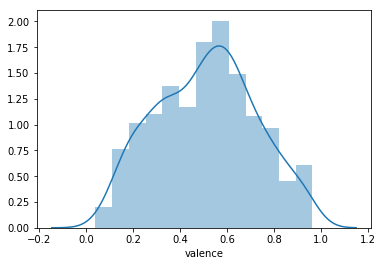

In [35]:
sns.distplot(myplaylists['valence']) #myplaylists has range of valence but mostly higher 

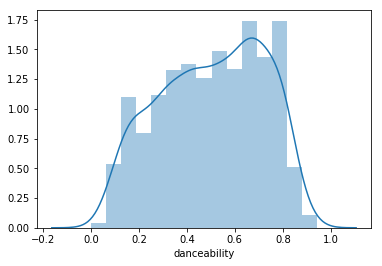

In [36]:
sns.distplot(studydf['danceability']) #studyplaylists danceability distribution
#huge range of danceability 

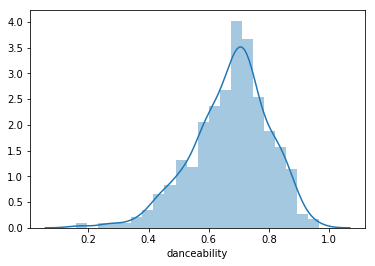

In [37]:
sns.distplot(myplaylists['danceability']) #myplaylist danceability distribution
#high danceability

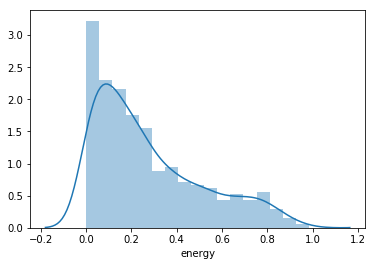

In [38]:
sns.distplot(studydf['energy']) #study playlist energy distribution
#study playlists had low energy 

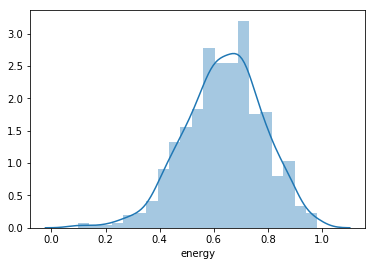

In [39]:
sns.distplot(myplaylists['energy']) #myplaylist energy distribution
#myplaylists have higher energy

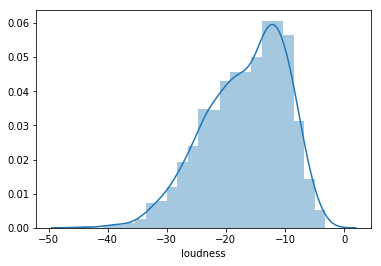

In [40]:
sns.distplot(studydf['loudness']) #study playlist loudness distribution
#studydf had really low loudness (bigger negative number)

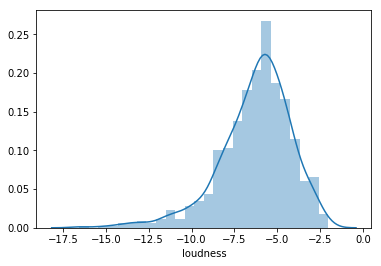

In [41]:
sns.distplot(myplaylists['loudness']) #myplaylist loudness distribution
#myplaylist has less negative number, so more loud than study playlists

# Studyplaylist tweets

run mongodb path to create new database that collects #studyplaylist tweets
    - mongod --dbpath /Users/Christy/Documents/Syracuse/IST652-\ Scripting/db
    
collect 1000 tweets
    - python run_twitter_simple_search_save.py "#studyplaylist" 1000 study study

In [42]:
import pymongo
from pymongo import MongoClient

In [43]:
client = pymongo.MongoClient('localhost', 27017)
client.list_database_names() #look at a list of all the databases

['admin',
 'config',
 'dw',
 'lastdance',
 'lax',
 'local',
 'peopldb',
 'peopledb',
 'project',
 'spotify',
 'study',
 'syracuse']

In [45]:
#create a function so that each tweet it has the date,
#the username, the tweet text, and the place (if there is one)
def printTweetData(tweets):
    for tweet in tweets:
        print('/nDate:', tweet['created_at'])
        print('From:', tweet['user']['name'])
        print('Message:', tweet['text'])
        if not tweet['place'] is None:
            print('Place:', tweet['place']['full_name'])

In [44]:
db = client.project #use the project database
db.list_collection_names()

['project']

In [46]:
coll = db.project
tweets = coll.find()
tweetlist = [tweet for tweet in tweets] #create a list of all the tweets
len(tweetlist) 

74

In [47]:
printTweetData(tweetlist) #use the function defined before on tweetlist

/nDate: Wed Apr 10 10:18:38 +0000 2019
From: Student Life
Message: #StudyPlaylist which somehow consists of random songs. I just realised that I added #KRISTPERAWATSKY into the playl… https://t.co/12X24szENo
/nDate: Mon Apr 15 22:14:04 +0000 2019
From: 50Artists50StatesApp
Message: RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
/nDate: Mon Apr 15 21:55:58 +0000 2019
From: @ProtestMusica
Message: RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
/nDate: Mon Apr 15 21:19:40 +0000 2019
From: LoFi Bot
Message: RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
/nDate: Mon Apr 15 20:27:55 +0000 2019
From: Fluorescencemusic
Message: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f

In [48]:
import pandas as pd
tweetdata = pd.DataFrame() #create an empty pandas dataframe

In [49]:
#input the dataframe with specific information from tweets
tweetdata['id'] = [tweet['id'] for tweet in tweetlist]
tweetdata['user'] = [tweet['user']['screen_name'] for tweet in tweetlist]
tweetdata['text'] = [tweet['text'] for tweet in tweetlist]
tweetdata['lang'] = [tweet['lang'] for tweet in tweetlist]
tweetdata['place'] = [tweet['place'] for tweet in tweetlist]
tweetdata['retweet_count'] = [tweet['retweet_count'] for tweet in tweetlist]
tweetdata['favorite_count'] = [tweet['favorite_count'] for tweet in tweetlist]

In [50]:
tweetdata #view the df

,id,user,text,lang,place,retweet_count,favorite_count
0,1115922024562483206,StudentLifes98,#StudyPlaylist which somehow consists of rando...,en,None,0,0
1,1117914008495874049,DubStep_Edm_,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
2,1117909454186524675,ProtestMusica,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
3,1117900321638862849,BotLofi,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
4,1117887297406431234,fluorescenceboi,#music #electronic #edm #electro #remix #songr...,und,None,4,2
5,1117827461906038785,bgmchannelbgm,Deep Sleeping Music👇\nhttps://t.co/aVU3FTFvxr\...,en,None,0,0
6,1117712525540450305,HellaChuffed06,Crunch time work ahead of me this week. Time t...,en,None,0,2
7,1117703579333042176,Silent__Knights,Happy Monday 😊👋🏻😊\n.\nHave a great week!\n.\nN...,en,None,0,0
8,1117490628617748482,bamelawyer,Stormy Sunday #StudyMusic — Sibelius: Symphoni...,en,None,0,0
9,1117252836683845632,bamelawyer,Rainy Saturday night #StudyMusic: Spotlight (O...,en,None,0,2


In [51]:
tweetdata.dtypes #the data types of each column

id                 int64
user              object
text              object
lang              object
place             object
retweet_count      int64
favorite_count     int64
dtype: object

In [52]:
tweetdata['user'][0] #take a look at the first tweet's user information

'StudentLifes98'

In [53]:
tweetdata['text'][0] #look at the first tweet

'#StudyPlaylist which somehow consists of random songs. I just realised that I added #KRISTPERAWATSKY into the playl… https://t.co/12X24szENo'

In [54]:
tweetdata.sort_values('retweet_count', ascending=False) 
#order the df by retweet counts

,id,user,text,lang,place,retweet_count,favorite_count
2,1117909454186524675,ProtestMusica,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
3,1117900321638862849,BotLofi,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
4,1117887297406431234,fluorescenceboi,#music #electronic #edm #electro #remix #songr...,und,None,4,2
1,1117914008495874049,DubStep_Edm_,RT @fluorescenceboi: #music #electronic #edm #...,und,None,4,0
35,1116338033257795584,Axiliya,FINALLY GOT A NEW SONG OUT! SHOW IT SOME LOVE ...,en,None,4,24
34,1116339203606859776,mardecaART,RT @Axiliya: FINALLY GOT A NEW SONG OUT! SHOW ...,en,None,4,0
29,1116524832236109824,StephanBeats,RT @Axiliya: FINALLY GOT A NEW SONG OUT! SHOW ...,en,None,4,0
59,1115000138622296065,CamUniMusic,RT @Study_Music_Cam: We’ve arrived in #Newcast...,en,None,3,0
60,1115000025216688128,Study_Music_Cam,We’ve arrived in #Newcastle for the start of o...,en,None,3,11
46,1115451366447689732,Deal_Seekers95,RT @SpaceHe44481892: Follow on youtube for mor...,en,None,3,0


In [55]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#necessary packages to import for further analysis

In [56]:
#made the tweets into sentences
sid = SentimentIntensityAnalyzer()
sentences = tweetdata['text']

In [57]:
sentences

0     #StudyPlaylist which somehow consists of rando...
1     RT @fluorescenceboi: #music #electronic #edm #...
2     RT @fluorescenceboi: #music #electronic #edm #...
3     RT @fluorescenceboi: #music #electronic #edm #...
4     #music #electronic #edm #electro #remix #songr...
5     Deep Sleeping Music👇\nhttps://t.co/aVU3FTFvxr\...
6     Crunch time work ahead of me this week. Time t...
7     Happy Monday 😊👋🏻😊\n.\nHave a great week!\n.\nN...
8     Stormy Sunday #StudyMusic — Sibelius: Symphoni...
9     Rainy Saturday night #StudyMusic: Spotlight (O...
10    RT @Study_Music_Cam: A beautiful day at the @T...
11    RT @fluorescenceboi: This is all too real\n#mu...
12    This is all too real\n#music #electronic #edm ...
13    #music #ambient #chill #chillmusic #ambientmus...
14    Scott buckley - She Moved Mountains 🌹 [Creativ...
15    A beautiful day at the @TheBrangwyn to bring o...
16    #studymotivation #studymusic #remembernipsey @...
17    RT @Study_Music_Cam: Sunny skies in #Swans

In [58]:
#look at the sentiment analysis of each sentence
#rates how positive, negative, or neutral the tweets were
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1},'.format(k, ss[k]), end='')
    print()
    
#did not use this because was not very informative

#StudyPlaylist which somehow consists of random songs. I just realised that I added #KRISTPERAWATSKY into the playl… https://t.co/12X24szENo
compound: 0.0,neg: 0.0,neu: 1.0,pos: 0.0,
RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
compound: 0.0,neg: 0.0,neu: 1.0,pos: 0.0,
RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
compound: 0.0,neg: 0.0,neu: 1.0,pos: 0.0,
RT @fluorescenceboi: #music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s #lofi…
compound: 0.0,neg: 0.0,neu: 1.0,pos: 0.0,
#music #electronic #edm #electro #remix #songremix #dubstep #bassdrop #song #songwriter #f4f #follow4follow #s4s… https://t.co/epn2SjP6Qg
compound: 0.0,neg: 0.0,neu: 1.0,pos: 0.0,
Deep Sleeping Music👇
https://t.co/aVU3FTFvxr

from Green Music BGM channel

#sleeping #s

In [59]:
#instead took a look at the frequency of words
#tokenized all the words in each tweet
col1=db.project
docs = col1.find()
doclist = list(docs)
tokenlist = [doc['text'] for doc in doclist if 'text' in doc.keys()]
all_tokens = [token for tweet in tokenlist for token in nltk.word_tokenize(tweet)]
len(all_tokens)

1975

In [60]:
all_tokens[:50] #top 50 tokens

['#',
 'StudyPlaylist',
 'which',
 'somehow',
 'consists',
 'of',
 'random',
 'songs',
 '.',
 'I',
 'just',
 'realised',
 'that',
 'I',
 'added',
 '#',
 'KRISTPERAWATSKY',
 'into',
 'the',
 'playl…',
 'https',
 ':',
 '//t.co/12X24szENo',
 'RT',
 '@',
 'fluorescenceboi',
 ':',
 '#',
 'music',
 '#',
 'electronic',
 '#',
 'edm',
 '#',
 'electro',
 '#',
 'remix',
 '#',
 'songremix',
 '#',
 'dubstep',
 '#',
 'bassdrop',
 '#',
 'song',
 '#',
 'songwriter',
 '#',
 'f4f',
 '#']

In [61]:
tweetFD = nltk.FreqDist(all_tokens)
tweetFD.most_common(30) #look at the top 30 most common words
#but symbols and other unuseful words showing up, so will get rid of them

[('#', 332),
 (':', 105),
 ('https', 63),
 ('@', 48),
 ('.', 33),
 ('to', 27),
 ('music', 26),
 ('RT', 25),
 (',', 24),
 ('our', 24),
 ('the', 23),
 ('of', 22),
 ('for', 19),
 ('-', 16),
 ('in', 16),
 ('TasterDaysOnTour', 15),
 ('electronic', 14),
 ('edm', 14),
 ('!', 14),
 ('is', 14),
 ('electro', 13),
 ('remix', 12),
 ('songremix', 12),
 ('dubstep', 12),
 ('bassdrop', 12),
 ('song', 12),
 ('’', 12),
 ('songwriter', 11),
 ('on', 9),
 ('Study_Music_Cam', 9)]

In [62]:
#first lower cased all the words
all_tokens = [token.lower() for tweet in tokenlist for token in nltk.word_tokenize(tweet)]
all_tokens[:30]

['#',
 'studyplaylist',
 'which',
 'somehow',
 'consists',
 'of',
 'random',
 'songs',
 '.',
 'i',
 'just',
 'realised',
 'that',
 'i',
 'added',
 '#',
 'kristperawatsky',
 'into',
 'the',
 'playl…',
 'https',
 ':',
 '//t.co/12x24szeno',
 'rt',
 '@',
 'fluorescenceboi',
 ':',
 '#',
 'music',
 '#']

In [63]:
#then removed stopwords like "and", "or", etc
nltk_stopwords = nltk.corpus.stopwords.words('english')
len(nltk_stopwords)

179

In [64]:
fstop = open('stopwords_word_twitter.txt', 'r') #read in stopwords txt

In [65]:
#shows the stopwords
stoptext = fstop.read()
stoptext

"'d\n'll\n'm\n're\n's\n've\na\nabout\nabove\nafter\nagain\nagainst\nall\nam\nan\nand\nany\nare\nas\nat\nbe\nbecause\nbeen\nbefore\nbeing\nbelow\nbetween\nboth\nbut\nby\ncan\ncannot\ncould\ndid\ndo\ndoes\ndoing\ndon't\ndown\nduring\neach\nfew\nfor\nfrom\nfurther\nget\nhad\nhas\nhave\nhaving\nhe\nhe'd\nhe'll\nhe's\nher\nhere\nhere's\nhers\nherself\nhim\nhimself\nhis\nhow\nhow's\ni\ni'd\ni'll\ni'm\ni've\nif\nin\ninto\nis\nit\nit's\nits\nitself\nlet's\nme\nmore\nmost\nmy\nmyself\nn't\nno\nnor\nnot\nof\noff\non\nonce\nonly\nor\nother\nought\nour\nours\nourselves\nout\nover\nown\nsame\nshe\nshe'd\nshe'll\nshe's\nshould\nso\nsome\nsuch\nthan\nthat\nthat's\nthe\ntheir\ntheirs\nthem\nthemselves\nthen\nthere\nthere's\nthese\nthey\nthey'd\nthey'll\nthey're\nthey've\nthis\nthose\nthrough\nto\ntoo\nunder\nuntil\nup\nvery\nwas\nwe\nwe'd\nwe'll\nwe're\nwe've\nwere\nwhat\nwhat's\nwhen\nwhen's\nwhere\nwhere's\nwhich\nwhile\nwho\nwho's\nwhom\nwhy\nwhy's\nwill\nwith\nwon't\nwould\nyou\nyou'd\nyou'll\nyou

In [66]:
#split the words above
stopwords = stoptext.split()
len(stopwords)

169

In [67]:
#all the tokens that do not have the stopwords
all_stopped_tokens = [token for token in all_tokens if not token in stopwords]
all_stopped_tokens[:50] #top 50 "new" tokens

['#',
 'studyplaylist',
 'somehow',
 'consists',
 'random',
 'songs',
 '.',
 'just',
 'realised',
 'added',
 '#',
 'kristperawatsky',
 'playl…',
 'https',
 ':',
 '//t.co/12x24szeno',
 'rt',
 '@',
 'fluorescenceboi',
 ':',
 '#',
 'music',
 '#',
 'electronic',
 '#',
 'edm',
 '#',
 'electro',
 '#',
 'remix',
 '#',
 'songremix',
 '#',
 'dubstep',
 '#',
 'bassdrop',
 '#',
 'song',
 '#',
 'songwriter',
 '#',
 'f4f',
 '#',
 'follow4follow',
 '#',
 's4s',
 '#',
 'lofi…',
 'rt',
 '@']

In [68]:
import re

In [69]:
#remove all unnecessary non-letter symbols
def alpha_filter(w):
    pattern = re.compile('^[^a-z]+$')
    
    if (pattern.match(w)):
        return True
    else:
        return False

In [70]:
#with created filter above, can remove random symbols from token list
token_list = [token for token in all_stopped_tokens if not alpha_filter(token)]
token_list[:30] #top 30 tokens

['studyplaylist',
 'somehow',
 'consists',
 'random',
 'songs',
 'just',
 'realised',
 'added',
 'kristperawatsky',
 'playl…',
 'https',
 '//t.co/12x24szeno',
 'rt',
 'fluorescenceboi',
 'music',
 'electronic',
 'edm',
 'electro',
 'remix',
 'songremix',
 'dubstep',
 'bassdrop',
 'song',
 'songwriter',
 'f4f',
 'follow4follow',
 's4s',
 'lofi…',
 'rt',
 'fluorescenceboi']

In [71]:
tweetFD = nltk.FreqDist(token_list) #use function freqdist to get frequency count of token list
top_words = tweetFD.most_common(30)
for word, freq in top_words:
    print(word, freq)

#clean token list
#top most common 30 words

https 63
music 34
rt 25
electronic 16
remix 16
song 15
tasterdaysontour 15
edm 14
studymusic 14
electro 13
songremix 12
dubstep 12
bassdrop 12
songwriter 11
new 10
now 10
study_music_cam 9
got 9
fluorescenceboi 8
f4f 8
focus 8
study 8
deep 7
nowplaying 7
day 7
lofi 7
follow4follow 6
ambient 6
ta 6
track 6


In [72]:
type(top_words) #check what type is top_words

list